# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo ```SINASC_RO_2019.csv``` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo ```estrutura_sinasc_para_CD.pdf``` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
``` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
```
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis ```['ESTCIVMAE', 'CONSULTAS']``` possuem o código ```9```, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código ```9```.<br>
6. Substitua os valores faltantes da quantitativa (```QTDFILVIVO```) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção ```inplace = True```.

In [2]:
import pandas as pd
import requests

# 1) seu código aqui
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape

(27028, 69)


(27028, 69)

In [3]:
# 2) seu código aqui
sinasc.isnull().sum()

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64

In [4]:
# 3) seu código aqui
sinasc[['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
 'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']].isna().sum()

LOCNASC          0
IDADEMAE         0
ESTCIVMAE      317
ESCMAE         312
QTDFILVIVO    1573
GESTACAO      1232
GRAVIDEZ        79
CONSULTAS        0
APGAR5         103
dtype: int64

In [5]:
# 4) seu código aqui
print(sinasc.shape)
sinasc.dropna(subset =['APGAR5'], inplace=True)
print(sinasc.shape)
print(sinasc['APGAR5'].isna().sum())

(27028, 69)
(26925, 69)
0


In [6]:
# 5) seu código aqui
print(sinasc[['ESTCIVMAE', 'CONSULTAS']].isna().sum())
sinasc['ESTCIVMAE'].fillna(9)

ESTCIVMAE    315
CONSULTAS      0
dtype: int64


0        5.0
1        2.0
2        9.0
3        5.0
4        2.0
        ... 
27023    2.0
27024    1.0
27025    2.0
27026    2.0
27027    5.0
Name: ESTCIVMAE, Length: 26925, dtype: float64

In [7]:
# 6) Seu código aqui
sinasc['QTDFILVIVO'].fillna(0)

0        0.0
1        1.0
2        2.0
3        0.0
4        1.0
        ... 
27023    1.0
27024    0.0
27025    0.0
27026    1.0
27027    1.0
Name: QTDFILVIVO, Length: 26925, dtype: float64

<AxesSubplot:>

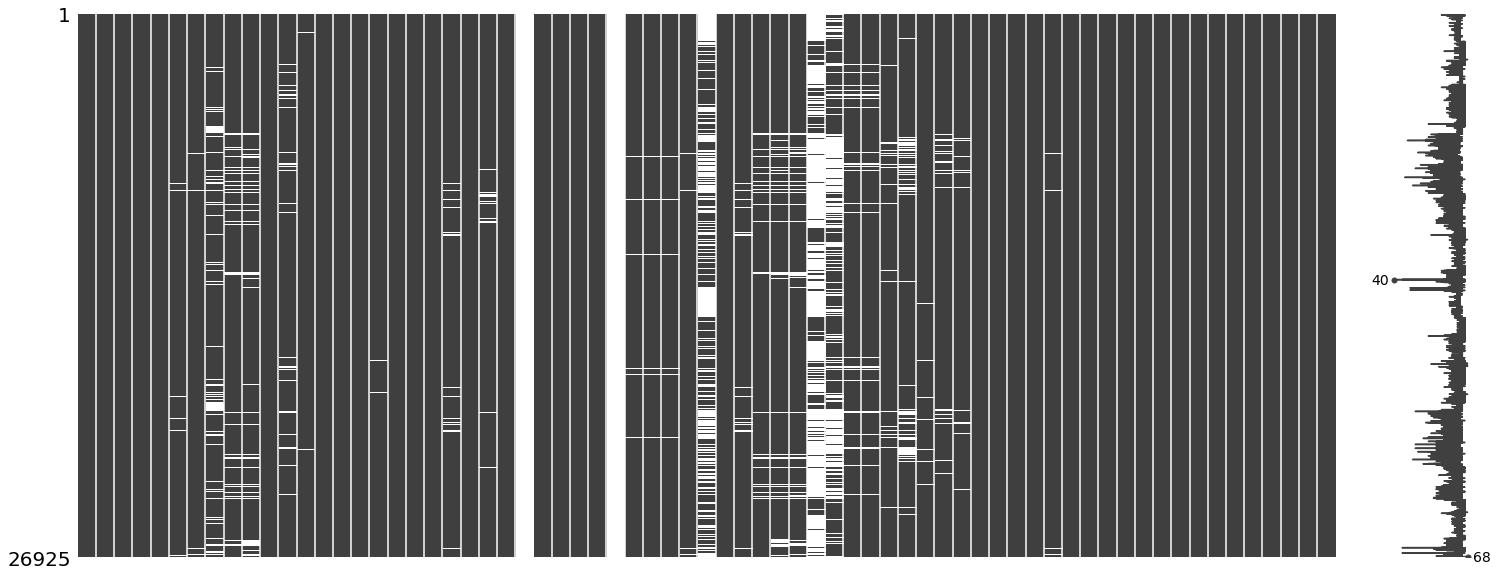

In [8]:
# 7) seu código aqui
import missingno as msno
msno.matrix(sinasc)

In [9]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        26925 non-null  int64  
 1   CODESTAB      26859 non-null  float64
 2   CODMUNNASC    26925 non-null  int64  
 3   LOCNASC       26925 non-null  int64  
 4   IDADEMAE      26925 non-null  int64  
 5   ESTCIVMAE     26610 non-null  float64
 6   ESCMAE        26615 non-null  object 
 7   CODOCUPMAE    24031 non-null  float64
 8   QTDFILVIVO    25359 non-null  float64
 9   QTDFILMORT    24836 non-null  float64
 10  CODMUNRES     26925 non-null  int64  
 11  GESTACAO      25709 non-null  object 
 12  GRAVIDEZ      26849 non-null  object 
 13  PARTO         26876 non-null  object 
 14  CONSULTAS     26925 non-null  int64  
 15  DTNASC        26925 non-null  object 
 16  HORANASC      26904 non-null  float64
 17  SEXO          26921 non-null  object 
 18  APGAR1        26921 non-nu

In [10]:
for i in sinasc.columns:
    sinasc[i] = sinasc[i].fillna(0)
# levando em consideração que nesse caso a existência de missings podem configurar campos não preenchidos, os missings foram tratados sendo substituidos por zeros
        

<AxesSubplot:>

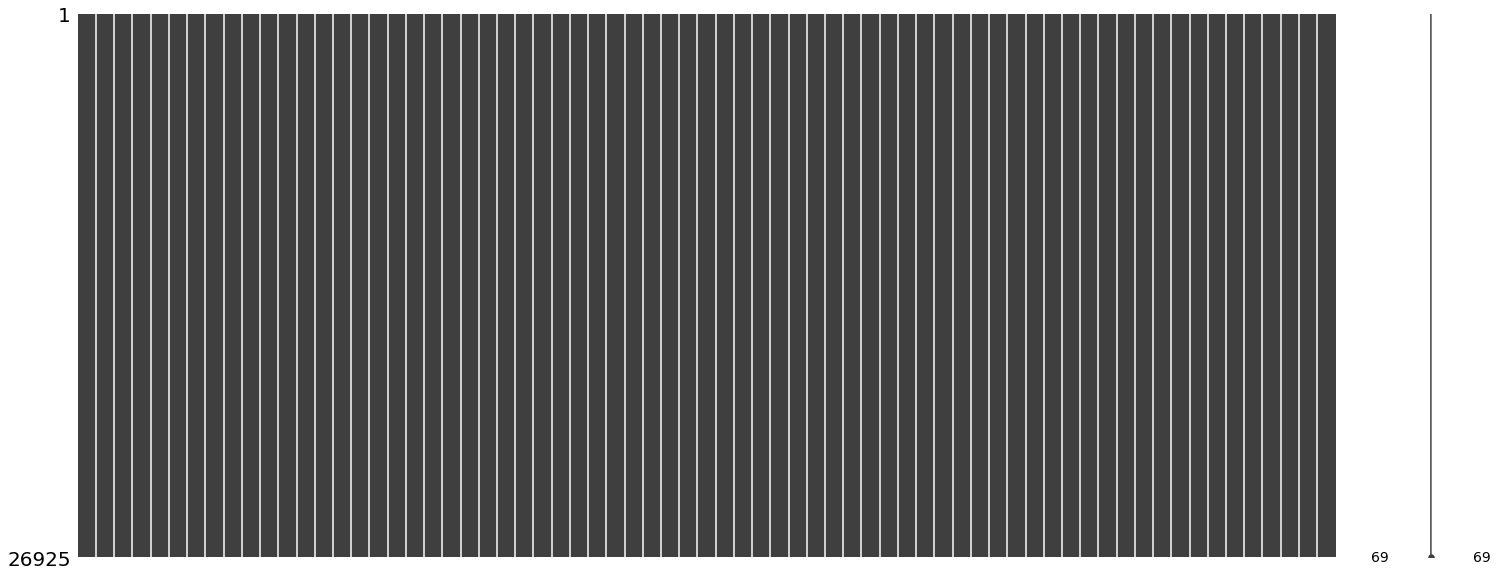

In [11]:
msno.matrix(sinasc)

In [14]:
# 8) seu código aqui
sinasc['APGAR5'].replace({0:'asfixia severa', 1:'asfixia severa',2:'asfixia severa',3:'asfixia severa',4:'asfixia moderada', 5: 'asfixia moderada', 6: 'asfixia leve', 7: 'asfixia leve', 8: 'normal', 9: 'normal',10: 'normal'},inplace=True)

In [19]:
sinasc['APGAR5'].value_counts()

normal              26463
asfixia leve          320
asfixia severa         74
asfixia moderada       68
Name: APGAR5, dtype: int64

In [21]:
# 9) seu código aqui
sinasc.rename(columns={'munResStatus':'mun_Res_Status', 'munResTipo':'mun_Res_Tipo', 'munResNome':'mun_Res_Nome',
       'munResUf':'mun_Res_Uf', 'munResLat':'mun_Res_Lat', 'munResLon':'mun_Res_Lon', 'munResAlt':'mun_Res_Alt', 'munResArea':'mun_Res_Area'},inplace=True)

    

In [23]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ORIGEM          26925 non-null  int64  
 1   CODESTAB        26925 non-null  float64
 2   CODMUNNASC      26925 non-null  int64  
 3   LOCNASC         26925 non-null  int64  
 4   IDADEMAE        26925 non-null  int64  
 5   ESTCIVMAE       26925 non-null  float64
 6   ESCMAE          26925 non-null  object 
 7   CODOCUPMAE      26925 non-null  float64
 8   QTDFILVIVO      26925 non-null  float64
 9   QTDFILMORT      26925 non-null  float64
 10  CODMUNRES       26925 non-null  int64  
 11  GESTACAO        26925 non-null  object 
 12  GRAVIDEZ        26925 non-null  object 
 13  PARTO           26925 non-null  object 
 14  CONSULTAS       26925 non-null  int64  
 15  DTNASC          26925 non-null  object 
 16  HORANASC        26925 non-null  float64
 17  SEXO            26925 non-null 